In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#plot pretty graphs
font = {'family' : 'serif',
'weight' : 'normal',
'size' : 25}


plt.rc('font', **font)
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [3]:
# import all data
eptwat_data = np.loadtxt("ptwat-04-nnp-energies-1-data.txt")
eptwat_ener = np.loadtxt("ptwat-04-1-ener.txt")

In [4]:
AIMD_energies = []
AIMD_time = []
with open("wat0m_9.8-32.1244ps_31892frm.txt", "r") as f:
    lines=f.readlines()
    for line in lines:
        if 'E =' in line:
            AIMD_energies.append(float(line.split()[-1]))
            AIMD_time.append(float(line.split()[-4][:-1]))

In [5]:
# create all data from the .txt file
eptwat_avg = eptwat_data[:,0]
eptwat_std = eptwat_data[:,1]
tempptwat = eptwat_ener[:,3]
timeptwater = eptwat_ener[:,-1]

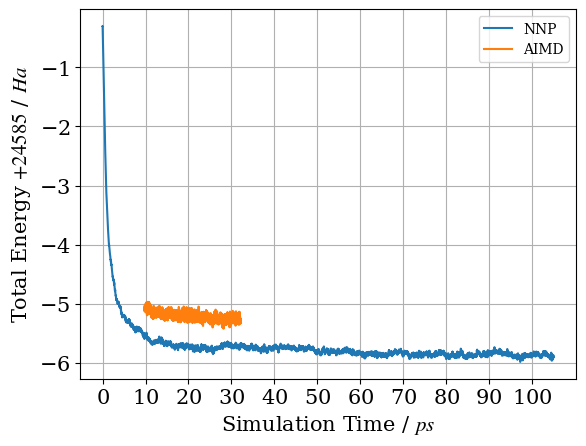

In [13]:
# plot energy evolution
plt.plot(np.arange(0,105.0007,0.0007), eptwat_avg+24585, label='NNP')
plt.plot(np.array(AIMD_time)/1000,np.array(AIMD_energies)+24585, label='AIMD')
plt.xticks(np.arange(0,105.001, 10))
plt.xlabel('Simulation Time / $ps$')
plt.ylabel('Total Energy $+24585$ / $Ha$')
plt.legend(loc=1, fontsize=10)
plt.grid()
plt.savefig('ener.png')

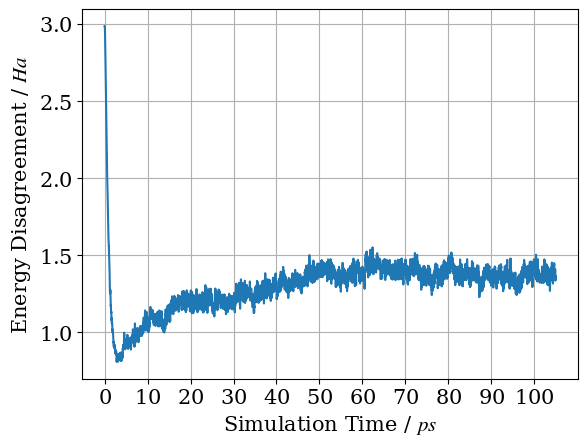

In [7]:
# plot energy committee disagreement
plt.plot(np.arange(0,105.0007,0.0007), eptwat_std)
plt.xticks(np.arange(0,105.001, 10))
plt.xlabel('Simulation Time / $ps$')
plt.ylabel('Energy Disagreement / $Ha$')
plt.grid()
plt.savefig('ener-dev.png')

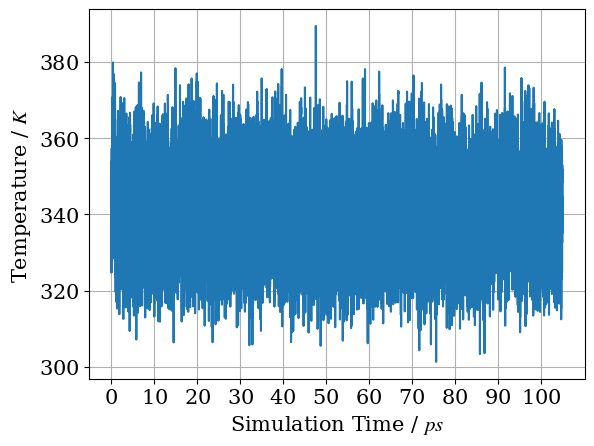

In [15]:
# plot temperature fluctuation
plt.plot(np.arange(0,105.0007,0.0007), tempptwat)
plt.xticks(np.arange(0,105.0007, 10))
plt.xlabel('Simulation Time / $ps$')
plt.ylabel('Temperature / $K$')
plt.grid()
plt.savefig('temp.png')